<a href="https://colab.research.google.com/github/buabaj/Employee-Attrition/blob/master/Employee_Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation
Here, I read in the datasets into my code file and work towards cleaning the data. This involves droping certain columns I don't need and adding columns I think will help make my work easier. I also print certain of the data to make sure its in the form i want.

In [4]:
#reading in the data
current_emp = pd.read_excel('data.xlsx', sheet_name = 'Existing employees')
ex_emp = pd.read_excel('data.xlsx', sheet_name = 'Employees who have left')

In [5]:
#printing the heads of the current_emp() data
current_emp.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [6]:
#printing the heads of the current_emp() data
ex_emp.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


## Exploratory Data Analysis
Here, I seek to gain in-depth knowledge and understanding of the data and problem. I use numerous python methods and functions to exploer all aspects of the data I have.

In [7]:
#checking the data
current_emp.isnull().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [8]:
current_emp.shape

(11428, 10)

In [9]:
ex_emp.isnull().sum()


Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [10]:
ex_emp.shape

(3571, 10)

In [11]:
current_emp.columns


Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [12]:
ex_emp.columns


Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [13]:
#now we add a new column called 'emp_status' to both data
#all current employees will have the value 'current'
#all ex-employees will have the value 'ex'
current_emp['emp_status'] = 'current'
ex_emp['emp_status'] = 'ex'

In [14]:
current_emp.columns


Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'emp_status'],
      dtype='object')

In [15]:
ex_emp.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'emp_status'],
      dtype='object')

In [16]:
#joining the data sets
data_join = [current_emp, ex_emp]

In [17]:
all_emp = pd.concat(data_join)

In [18]:
all_emp

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,emp_status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,current
1,2002,0.82,0.67,2,202,3,0,0,sales,low,current
2,2003,0.45,0.69,5,193,3,0,0,sales,low,current
3,2004,0.78,0.82,5,247,3,0,0,sales,low,current
4,2005,0.49,0.60,3,214,2,0,0,sales,low,current
...,...,...,...,...,...,...,...,...,...,...,...
3566,14995,0.40,0.57,2,151,3,0,0,support,low,ex
3567,14996,0.37,0.48,2,160,3,0,0,support,low,ex
3568,14997,0.37,0.53,2,143,3,0,0,support,low,ex
3569,14998,0.11,0.96,6,280,4,0,0,support,low,ex


In [19]:
all_emp.isnull().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
emp_status               0
dtype: int64

In [20]:
all_emp.shape

(14999, 11)

In [21]:
all_emp.drop('Emp ID', inplace=True, axis=1)

In [22]:
all_emp.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
emp_status               0
dtype: int64

## Correlation matrix
here, I seek to find out the correlation of data fron both data sets using a pairplot correlation marix and a correlation heatmap

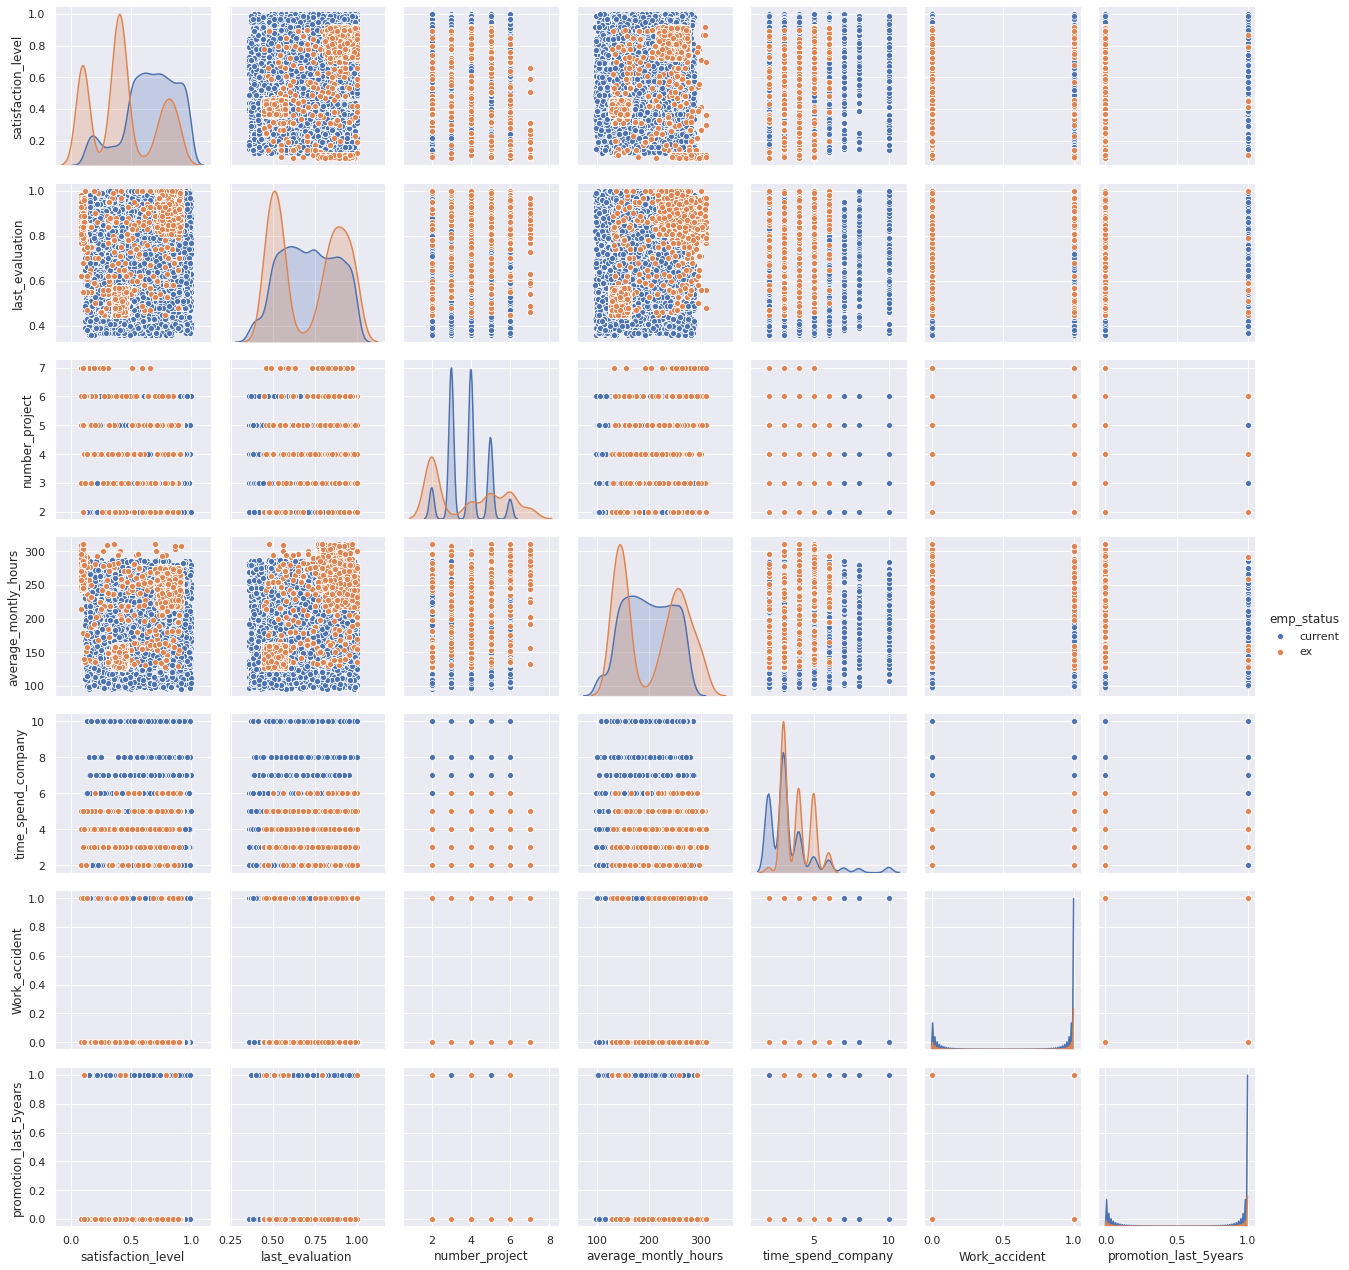

In [23]:
#plotting a correlation matrix to compare the values of the joined data
sns.set(rc={'figure.figsize':(30.7,8.27)})
g = sns.pairplot(all_emp, hue = 'emp_status');
plt.savefig('CorrelationPairPlot.png')

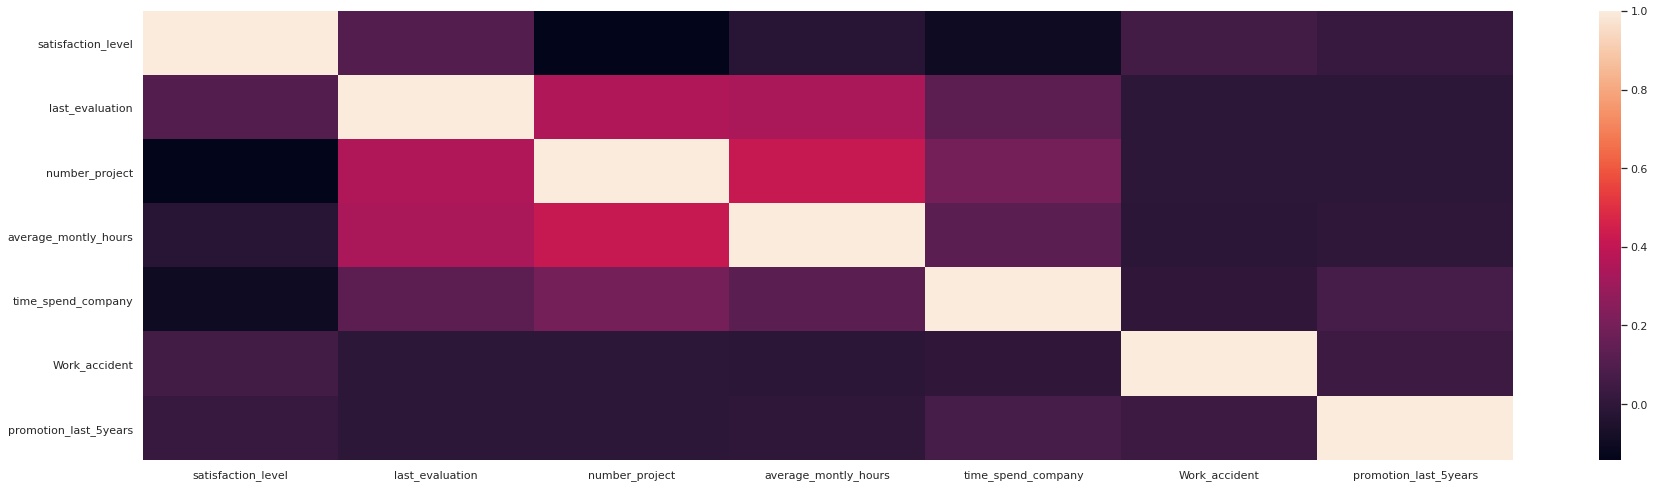

In [24]:
sns.heatmap(all_emp.corr())
plt.savefig('CorrelationHeatmap.png')

From the correlations above we can note the following:

-Slight positive correlation between number of projects and average monthly hours worked
-Employees that left the company tend to have low satisfaction levels

## Data Visualization
Here I seek to notice and understand factors of employee attrition by visualizing data and noticing certain trands from the data

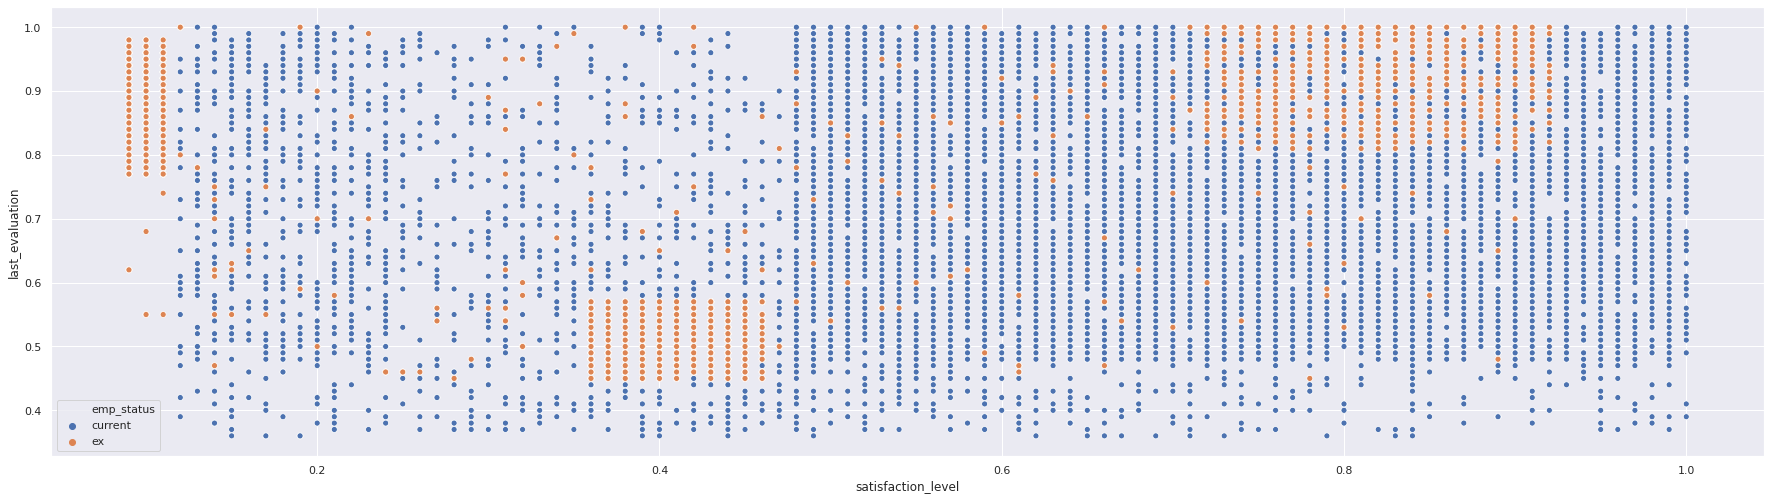

In [25]:
sns.scatterplot(x=all_emp["satisfaction_level"], y=all_emp["last_evaluation"], hue=all_emp["emp_status"])
plt.savefig('Satisfaction-Last_eval.png')

from the scatter plot above, we can tell that current employees tend to have higher satisfaction and more frequent evaluations as compared to ex-employees

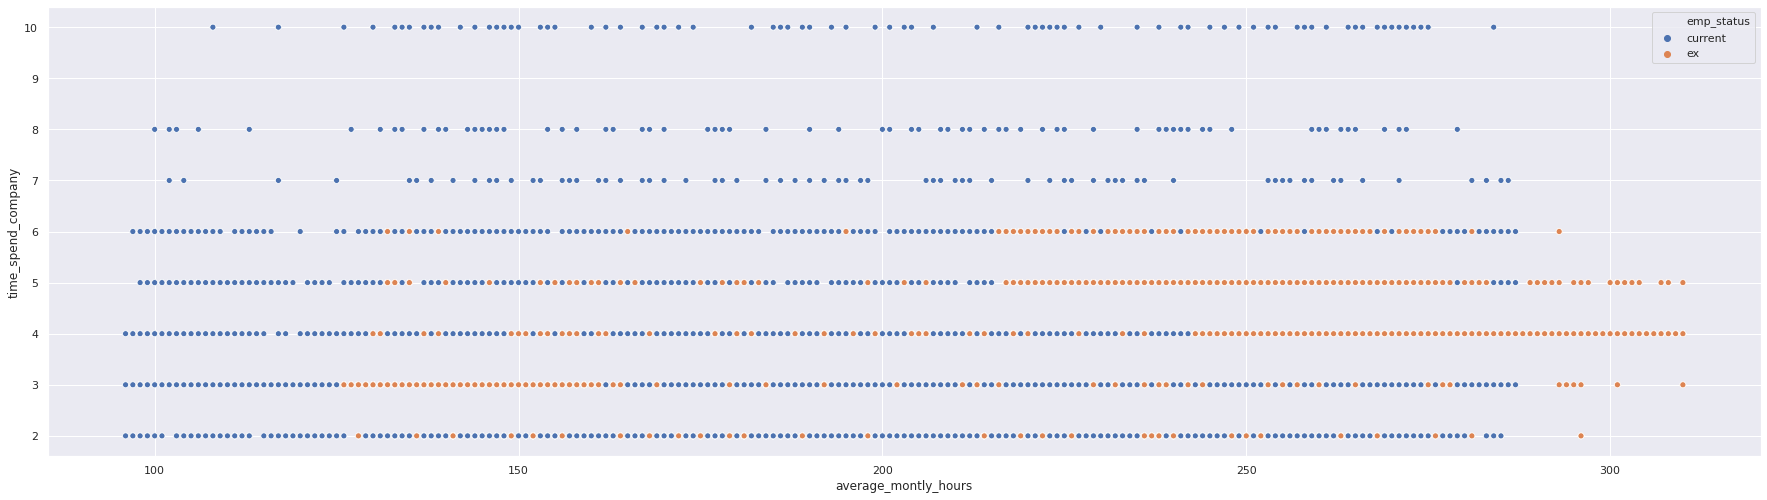

In [26]:
sns.scatterplot(x=all_emp["average_montly_hours"],y=all_emp["time_spend_company"],hue=all_emp["emp_status"])
plt.savefig('avg_hours-time_spent.png')

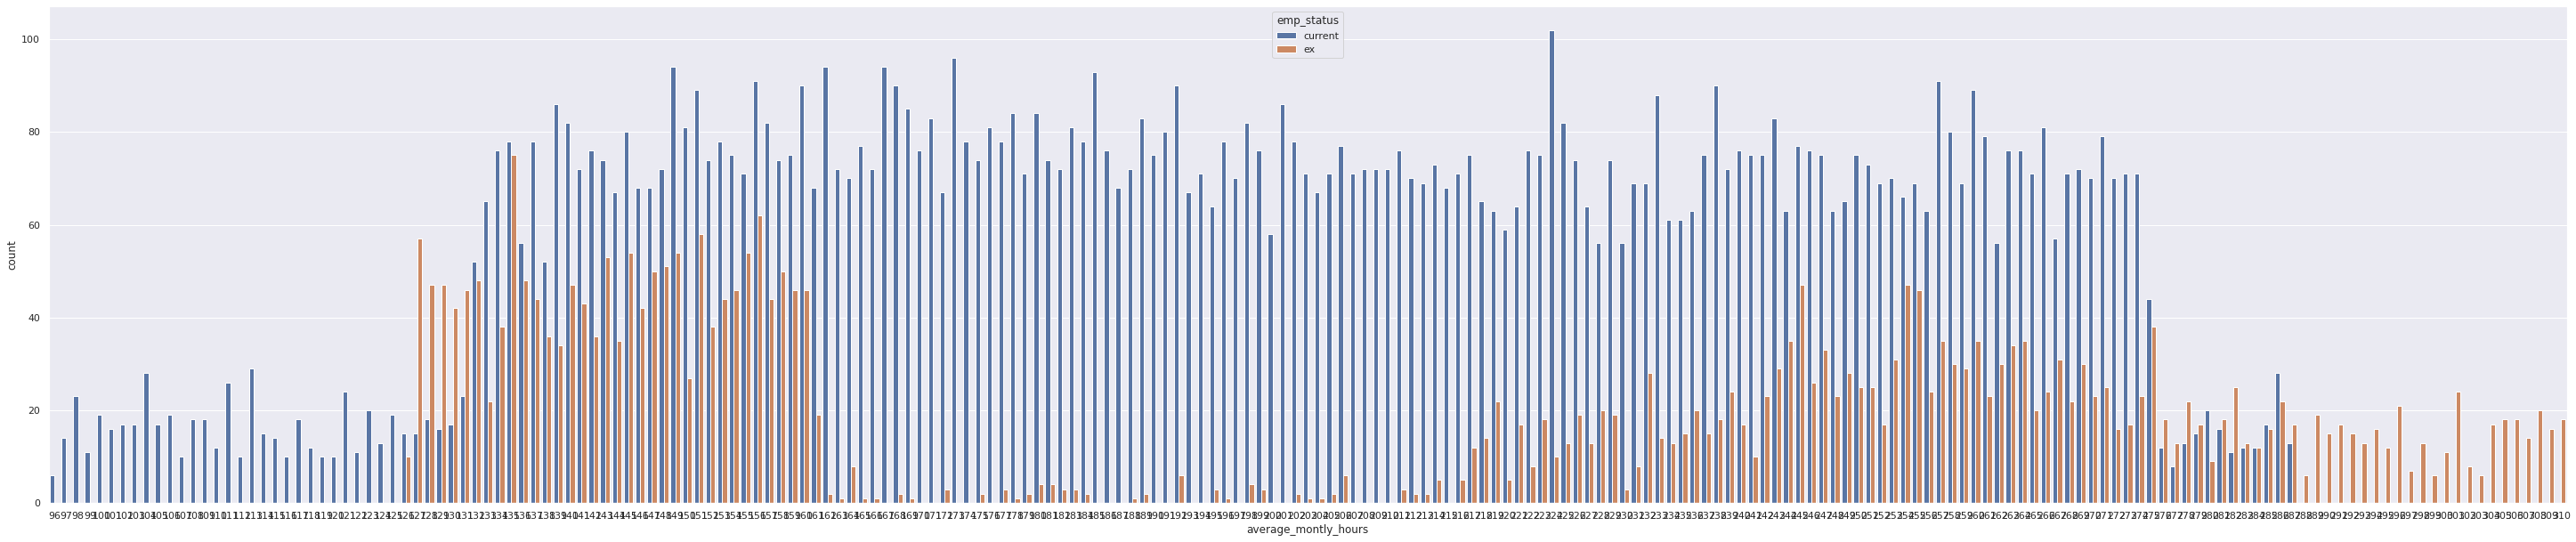

In [27]:
sns.set(rc={'figure.figsize':(50.7,10.27)})
sns.countplot(all_emp["average_montly_hours"], hue=all_emp["emp_status"])
plt.savefig('average_monthly_hours.png')

In [28]:
all_emp['average_montly_hours'].max()

310

In [29]:
all_emp['average_montly_hours'].min()

96

In [30]:
all_emp.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'emp_status'],
      dtype='object')

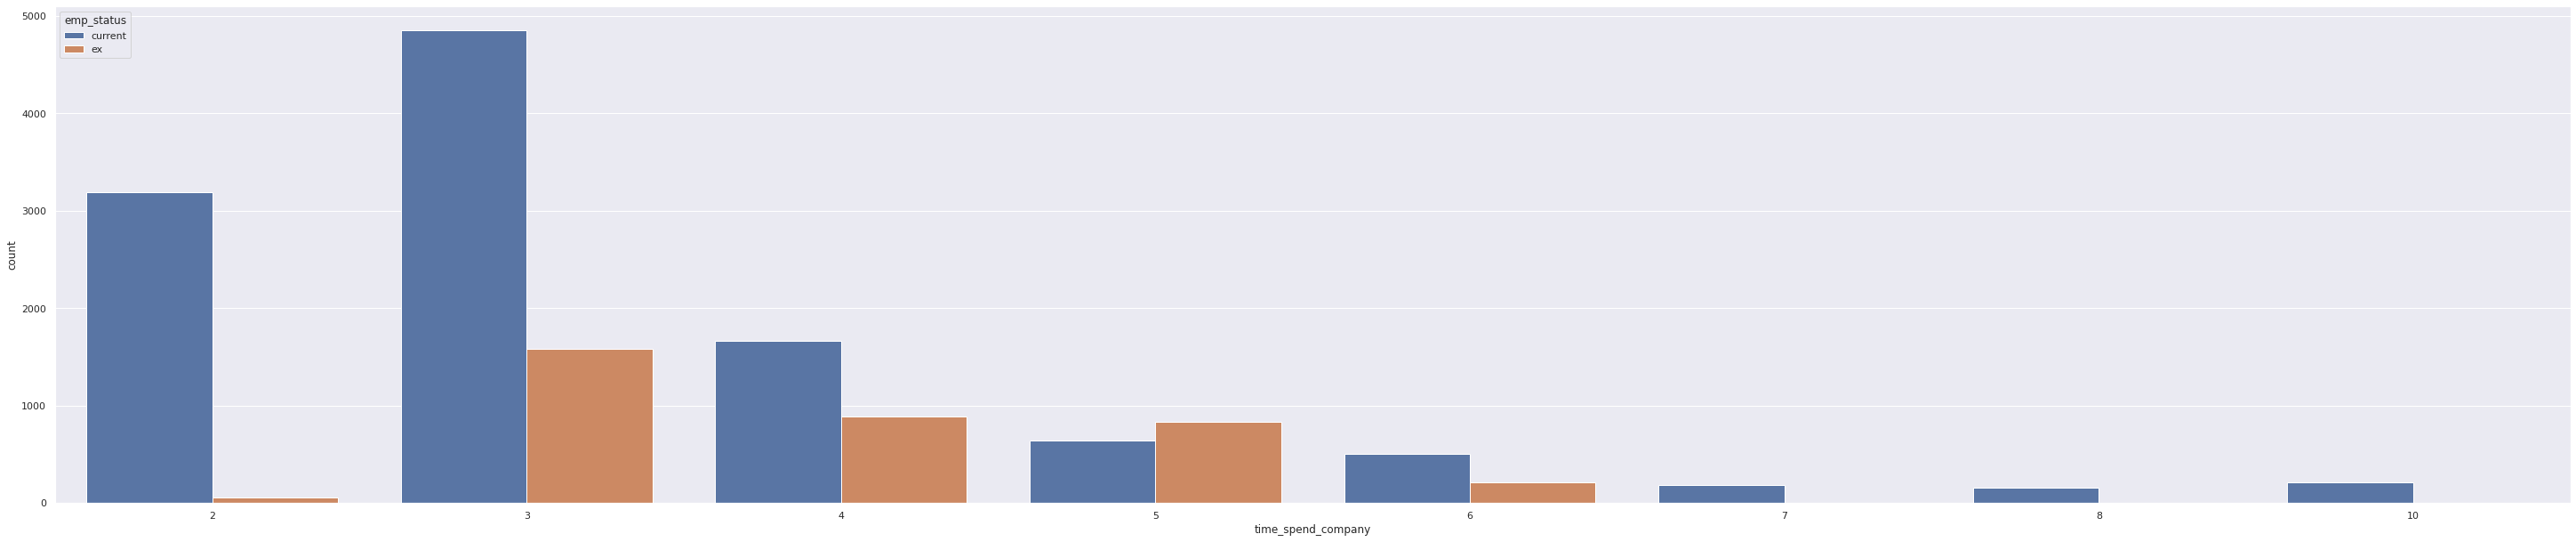

In [31]:
sns.countplot(all_emp['time_spend_company'], hue = all_emp['emp_status'])
plt.savefig('time_spent.png')

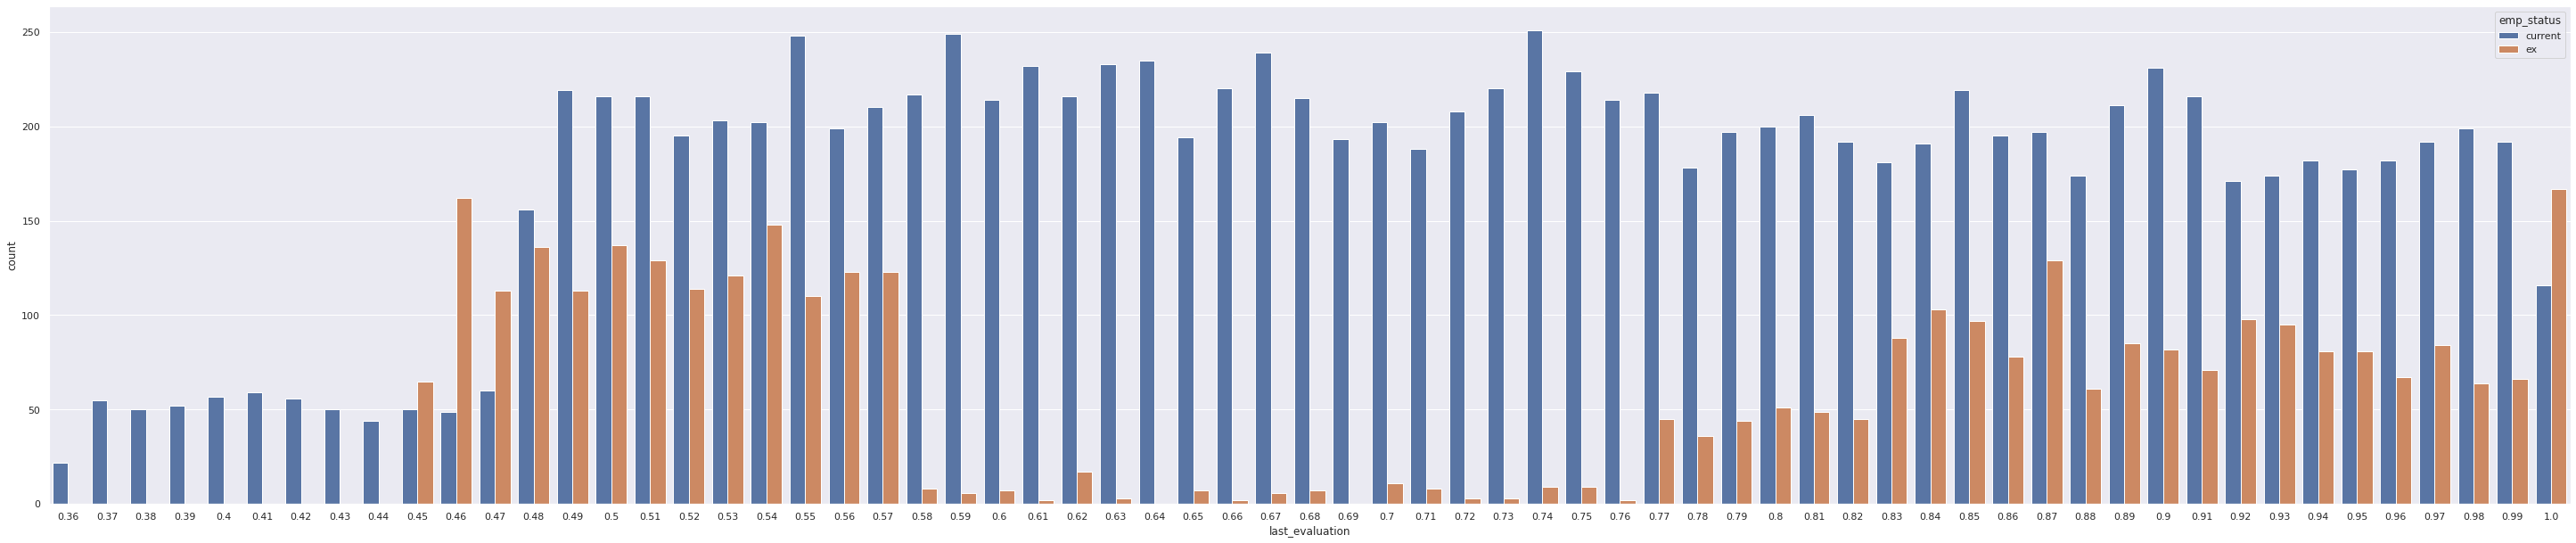

In [32]:
sns.countplot(all_emp['last_evaluation'], hue = all_emp['emp_status'])
plt.savefig('last_eval.png')

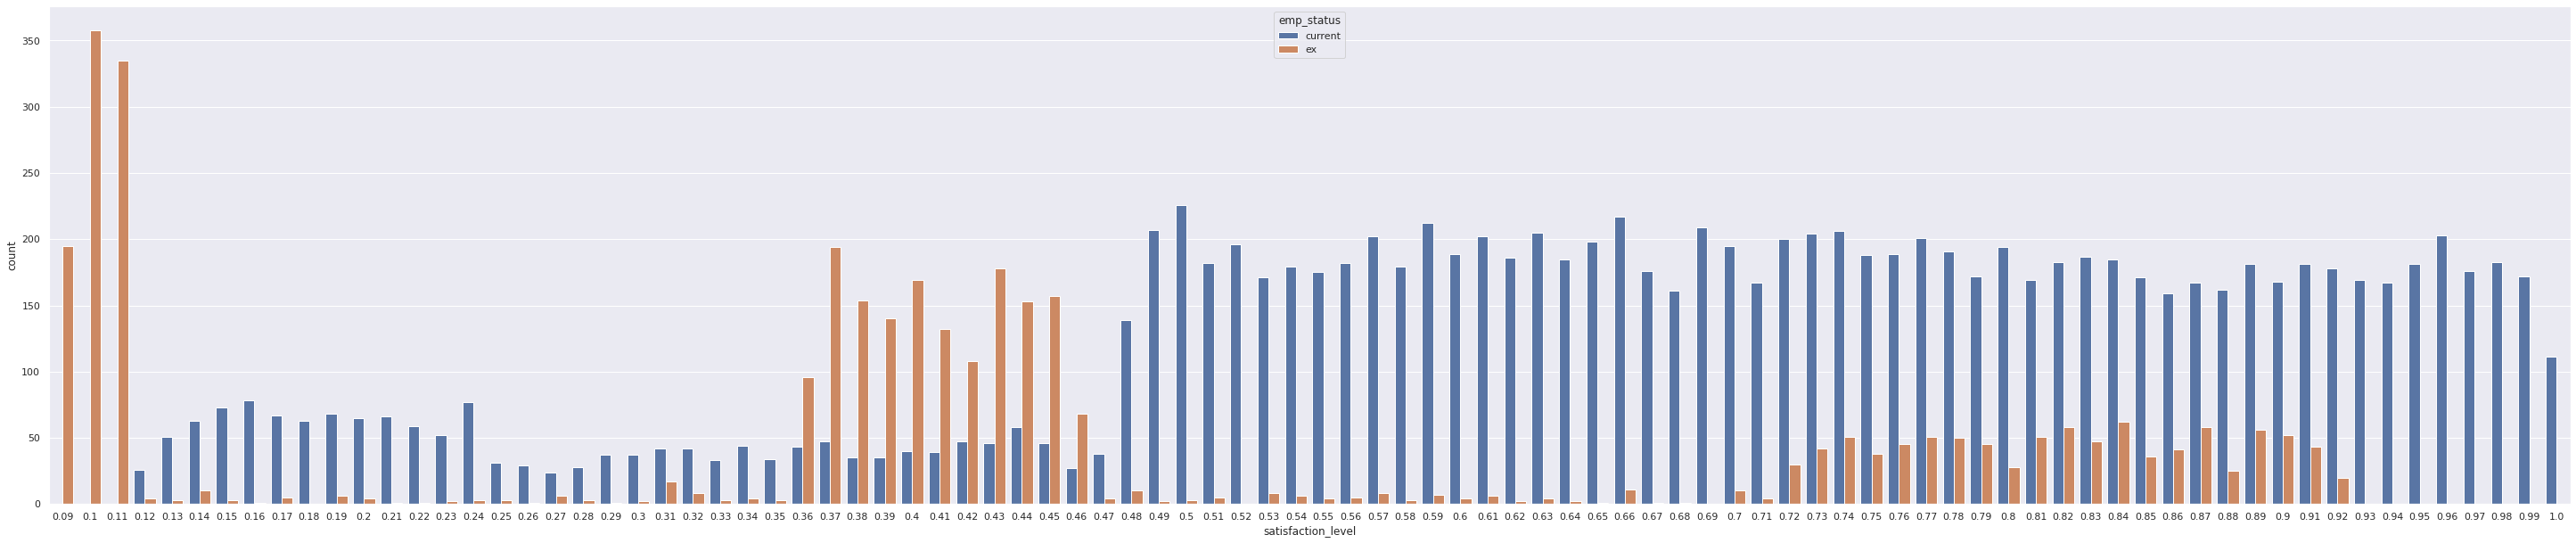

In [33]:
sns.countplot(all_emp['satisfaction_level'], hue = all_emp['emp_status'])
plt.savefig('satisfaction_level.png')

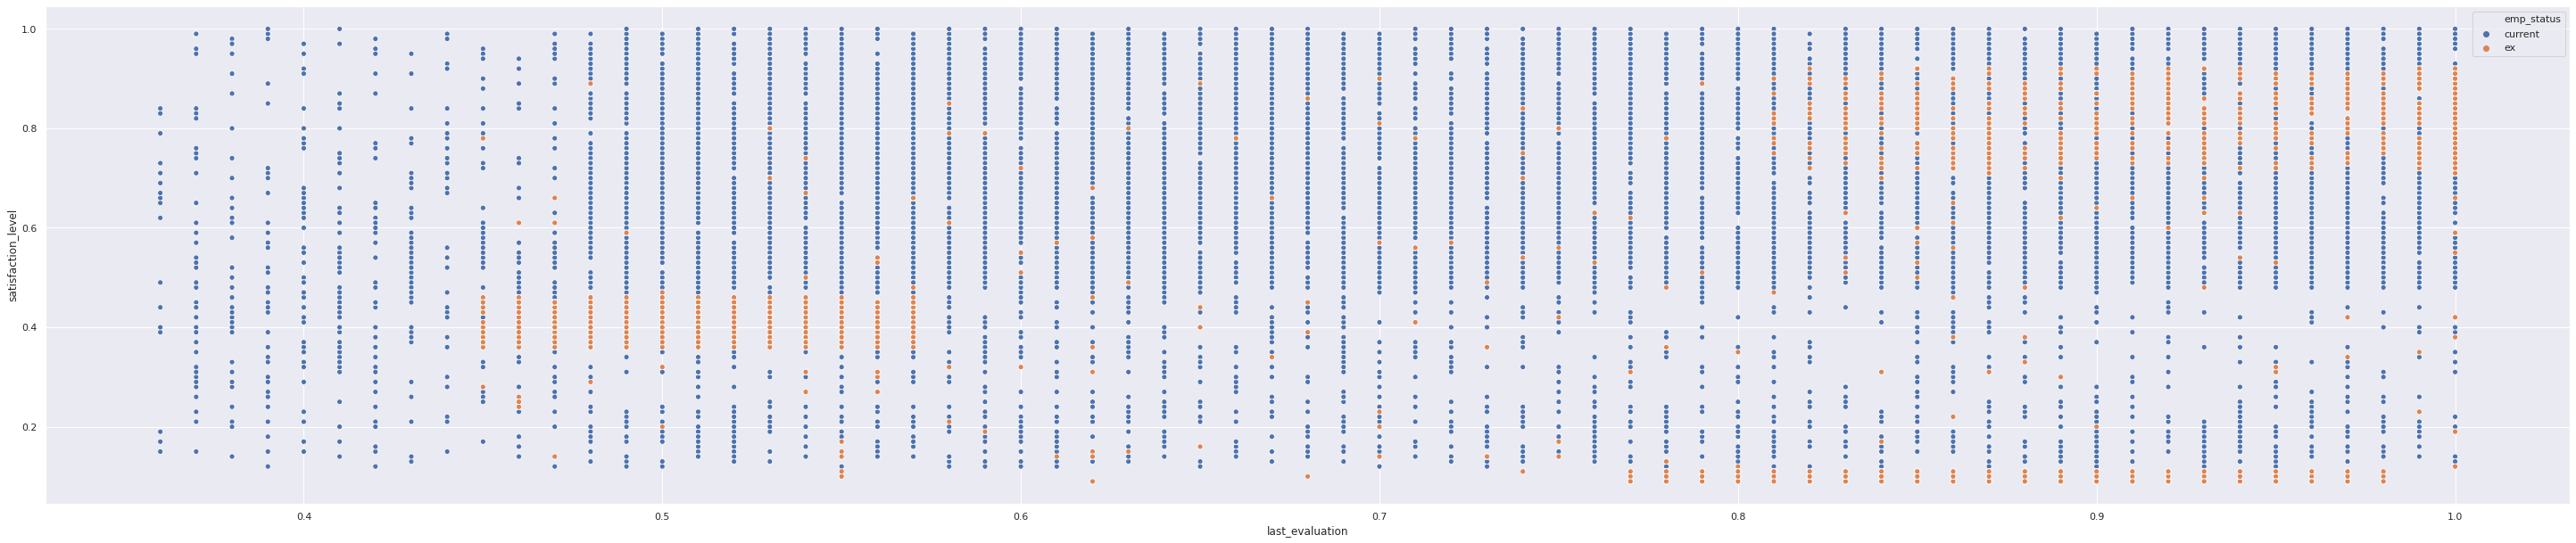

In [34]:
sns.scatterplot(x=all_emp['last_evaluation'], y=all_emp['satisfaction_level'], hue= all_emp['emp_status'])


From the visualisations above, we can infer that there are three distinct groups of employees that left the company:

Group 1 : low evaluation score, low satisfaction level, low hours worked. based on their hours worked, would probably consists mostly of unmotivated workers or part-time workers. May be subjected to other variables.

Group 2 : high evaluation score, high satisfaction level, high hours worked. Due to their high contribution, they are likely to leave the company to pursue a better opportunity presented (such as poaching/headhunting by other company).

Group 3 : very high evaluation score, very low satisfaction level, very high hours worked. Likely to leave the company due to being overworked.

# Constructing Predictive Models

In [35]:
#splitting data into training and testing data
#droping columns we dont need for the model
all_emp.drop('dept', inplace= True, axis= 1)


In [36]:
all_emp.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'emp_status'],
      dtype='object')

In [37]:
#enconding aspects of data for machine learning
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
all_emp['emp_status'] = le.fit_transform(all_emp['emp_status'])
all_emp['salary'] = le.fit_transform(all_emp['salary'])
all_emp['salary']

0       1
1       1
2       1
3       1
4       1
       ..
3566    1
3567    1
3568    1
3569    1
3570    1
Name: salary, Length: 14999, dtype: int64

In [38]:
all_emp['emp_status']


0       0
1       0
2       0
3       0
4       0
       ..
3566    1
3567    1
3568    1
3569    1
3570    1
Name: emp_status, Length: 14999, dtype: int64

In [39]:
#with the encoded values of 'salary',  0 stands for high, 1 for low and 2 for medium
current_emp.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,emp_status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,current
1,2002,0.82,0.67,2,202,3,0,0,sales,low,current
2,2003,0.45,0.69,5,193,3,0,0,sales,low,current
3,2004,0.78,0.82,5,247,3,0,0,sales,low,current
4,2005,0.49,0.60,3,214,2,0,0,sales,low,current


In [40]:
ex_emp.head()


,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,emp_status
0,1,0.38,0.53,2,157,3,0,0,sales,low,ex
1,2,0.80,0.86,5,262,6,0,0,sales,medium,ex
2,3,0.11,0.88,7,272,4,0,0,sales,medium,ex
3,4,0.72,0.87,5,223,5,0,0,sales,low,ex
4,5,0.37,0.52,2,159,3,0,0,sales,low,ex


In [41]:
all_emp.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,emp_status
0,0.58,0.74,4,215,3,0,0,1,0
1,0.82,0.67,2,202,3,0,0,1,0
2,0.45,0.69,5,193,3,0,0,1,0
3,0.78,0.82,5,247,3,0,0,1,0
4,0.49,0.60,3,214,2,0,0,1,0


In [42]:
X= all_emp[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary']].values
Y = all_emp[['emp_status']].values

In [43]:
X

array([[0.58, 0.74, 4.  , ..., 0.  , 0.  , 1.  ],
       [0.82, 0.67, 2.  , ..., 0.  , 0.  , 1.  ],
       [0.45, 0.69, 5.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 0.  , 1.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 0.  , 1.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 0.  , 1.  ]])

In [44]:
Y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [45]:
X.shape

(14999, 8)

In [46]:
Y.shape

(14999, 1)

Splitting into train and test data

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .35)

In [48]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

SVC = SVC()
KNN = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
LR = LogisticRegression()
RF = RandomForestClassifier()

In [49]:
SVC.fit(X_train, y_train)
KNN.fit(X_train, y_train)
DTC.fit(X_train, y_train)
LR.fit(X_train, y_train)
RF.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
#Predicting the values
DTC_prediction = DTC.predict(X_test)
KNN_prediction = KNN.predict(X_test)
SVC_prediction = SVC.predict(X_test)
LR_prediction = LR.predict(X_test)
RF_prediction = RF.predict(X_test)


In [51]:
#checking the accuracy score and confusion matrix and classification report of our model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def Performance(Prediction , actualValue, model):
    print(f"Accuracy score for {model} is {accuracy_score(Prediction, actualValue)}")
    print('\n')
    print(f"confussion matrix for {model} is '\n' {confusion_matrix(Prediction, actualValue)}")
    print('\n')
    print(f"classification report for {model} is {classification_report(Prediction, actualValue)}")

In [52]:
Performance(DTC_prediction, y_test, 'Decision Tree')


Accuracy score for Decision Tree is 0.9729523809523809


confussion matrix for Decision Tree is '
' [[3911   48]
 [  94 1197]]


classification report for Decision Tree is               precision    recall  f1-score   support

           0       0.98      0.99      0.98      3959
           1       0.96      0.93      0.94      1291

    accuracy                           0.97      5250
   macro avg       0.97      0.96      0.96      5250
weighted avg       0.97      0.97      0.97      5250



In [53]:
Performance(KNN_prediction, y_test, 'K-Nearest Neighbors')


Accuracy score for K-Nearest Neighbors is 0.9405714285714286


confussion matrix for K-Nearest Neighbors is '
' [[3799  106]
 [ 206 1139]]


classification report for K-Nearest Neighbors is               precision    recall  f1-score   support

           0       0.95      0.97      0.96      3905
           1       0.91      0.85      0.88      1345

    accuracy                           0.94      5250
   macro avg       0.93      0.91      0.92      5250
weighted avg       0.94      0.94      0.94      5250



In [54]:
Performance(SVC_prediction, y_test, 'Support Vector Machine')


Accuracy score for Support Vector Machine is 0.7834285714285715


confussion matrix for Support Vector Machine is '
' [[4005 1137]
 [   0  108]]


classification report for Support Vector Machine is               precision    recall  f1-score   support

           0       1.00      0.78      0.88      5142
           1       0.09      1.00      0.16       108

    accuracy                           0.78      5250
   macro avg       0.54      0.89      0.52      5250
weighted avg       0.98      0.78      0.86      5250



In [55]:
Performance(LR_prediction, y_test, 'Logistic Regression')


Accuracy score for Logistic Regression is 0.7622857142857142


confussion matrix for Logistic Regression is '
' [[3680  923]
 [ 325  322]]


classification report for Logistic Regression is               precision    recall  f1-score   support

           0       0.92      0.80      0.86      4603
           1       0.26      0.50      0.34       647

    accuracy                           0.76      5250
   macro avg       0.59      0.65      0.60      5250
weighted avg       0.84      0.76      0.79      5250



In [56]:
Performance(RF_prediction, y_test, 'Random Forest')


Accuracy score for Random Forest is 0.9891428571428571


confussion matrix for Random Forest is '
' [[3996   48]
 [   9 1197]]


classification report for Random Forest is               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4044
           1       0.96      0.99      0.98      1206

    accuracy                           0.99      5250
   macro avg       0.98      0.99      0.98      5250
weighted avg       0.99      0.99      0.99      5250



In [57]:

# creating a dataframe of the accuracy scores
acc_score = [['Decision tree',0.9765714285714285], ['K-Nearest Neighbors', 0.944], ['Support Vector Machine', 0.7811428571428571], ['Logistic Regression',0.7632380952380953], ['Random Forest',0.9908571428571429]]
df = pd.DataFrame(acc_score, columns = ['Model', 'Accuracy'])
df.set_index('Model', inplace=True)

In [58]:
df

,Accuracy
Model,
Decision tree,0.976571
K-Nearest Neighbors,0.944000
Support Vector Machine,0.781143
Logistic Regression,0.763238
Random Forest,0.990857


With results from the Accuracy scores, we can see that the Random Forest Classifier most accurately predicts the outcome of employees in the company


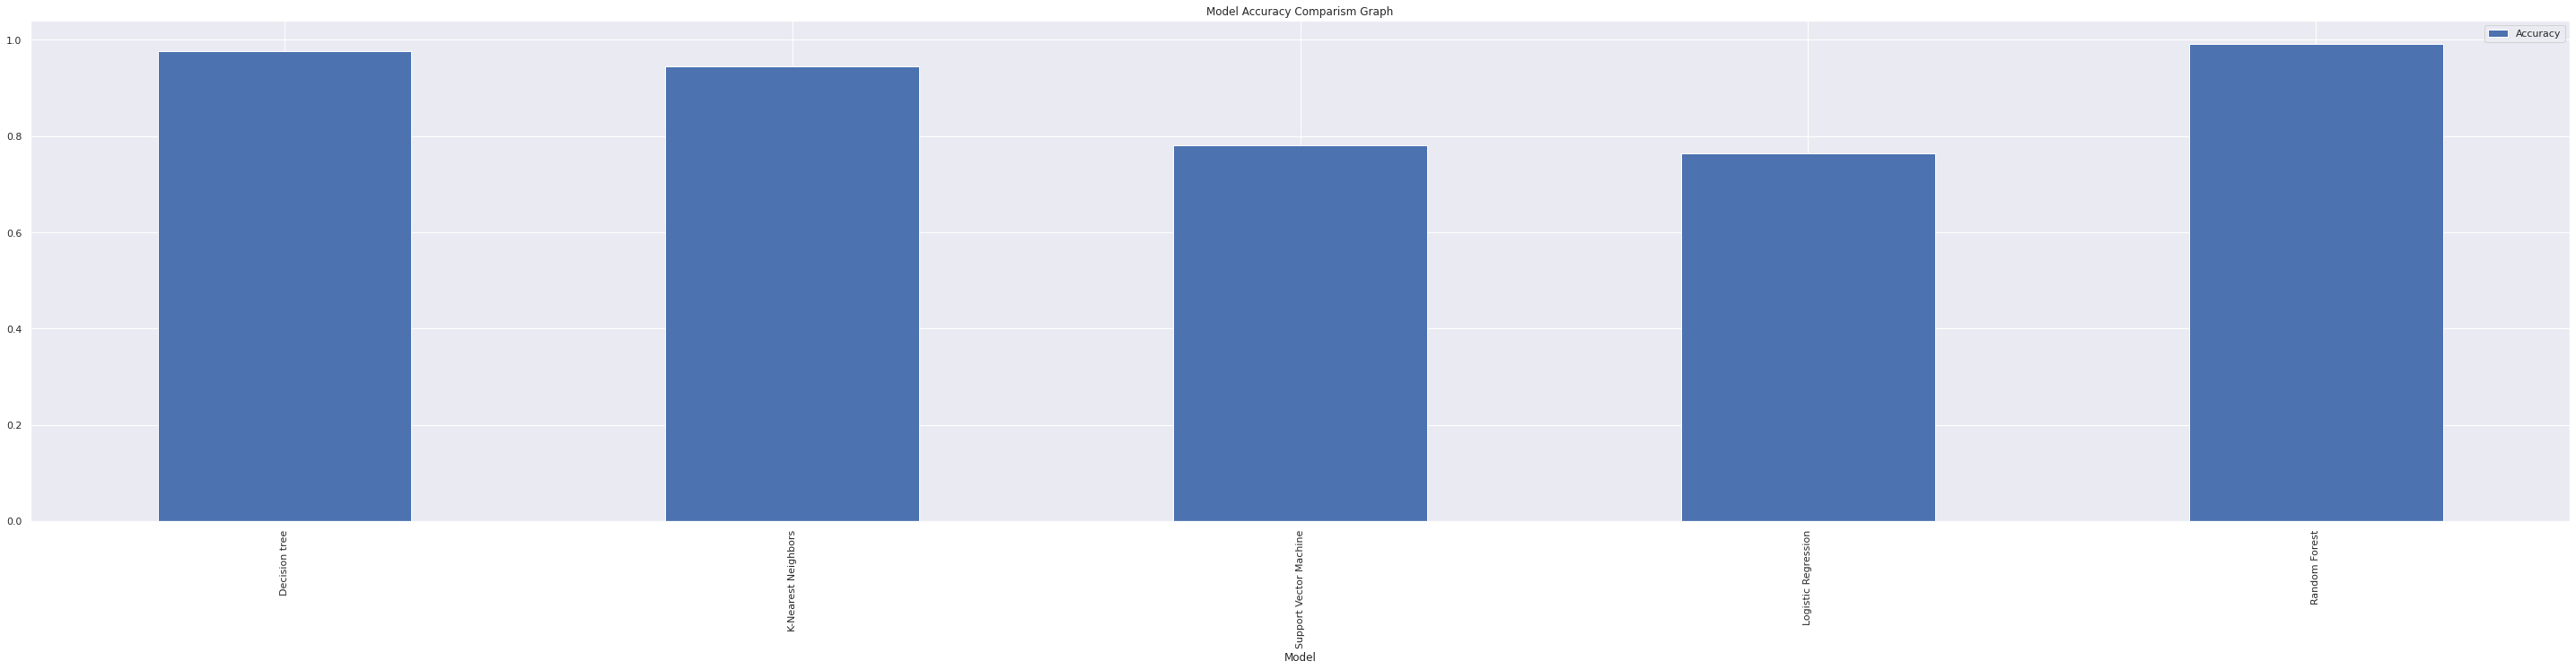

In [59]:
df.plot(kind='bar', title = 'Model Accuracy Comparism Graph')
plt.savefig('Model Accuracy Comparism Graph.png')

# Drawing conclusions fron my analysis
**From the analysis performed, I can conclude that:**


*   some employees left the company with no specific traits or factors that influenced them to leave 

*   some employees left the company in search for better positions in other companies since they didn't seem to have any underlying factors for leaving
*   some employees left the company because they are being overworked

*   Officials should make sure not to give employees more that 6 projects per month
*   Officials should look out for employees with satisfaction scores of below 0.5. P
ersonal engagement is advised for such employees

*   Officials should make sure not to work employees for more than 250 hours averagely per month as this may cause employees to leave the company as a result of being overworked.